## Exercise - Train and evaluate a clustering model

### Clustering - Introduction

In contrast to supervised machine learning, unsupervised learning is used when there is no "ground truth" from which to train and validate label predictions. [Denetimli makine öğreniminin aksine, etiket tahminlerini eğitmek ve doğrulamak için 'temel gerçeği' olmadığında denetimsiz öğrenme kullanılır.] The most common form of unsupervised learning is clustering, which is simllar conceptually to classification, except that the the training data does not include known values for the class label to be predicted. [Denetimsiz öğrenmenin en yaygın biçimi, eğitim verilerinin tahmin edilecek sınıf etiketi için bilinen değerleri içermemesi dışında, kavramsal olarak sınıflandırmaya benzeyen kümelemedir.] Clustering works by separating the training cases based on similarities that can be determined from their feature values. [Kümeleme, eğitim durumlarını öznitelik değerlerinden belirlenebilen benzerliklere göre ayırarak çalışır.] Think of it this way; the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. [Bu şekilde düşün; belirli bir varlığın sayısal özellikleri, varlığın n boyutlu uzaydaki konumunu tanımlayan vektör koordinatları olarak düşünülebilir.] What a clustering model seeks to do is to identify groups, or clusters, of entities that are close to one another while being separated from other clusters. [Bir kümeleme modelinin yapmaya çalıştığı şey, diğer kümelerden ayrılırken birbirine yakın olan varlıkların gruplarını veya kümelerini belirlemektir.]

For example, let's take a look at a dataset that contains measurements of different species of wheat seed. [Örneğin, farklı buğday tohumu türlerinin ölçümlerini içeren bir veri kümesine bakalım.]

**Citation**: The seeds dataset used in the this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. [Alıntı: Bu alıştırmada kullanılan tohum veri seti orijinal olarak Lublin'deki Polonya Bilimler Akademisi Agrofizik Enstitüsü tarafından yayınlandı ve UCI veri seti deposundan indirilebilir (Dua, D. ve Graff, C.] (2019). [(2019).] UCI Machine Learning Repository http://archive.ics.uci.edu/ml. [UCI Makine Öğrenimi Deposu http://archive.ics.uci.edu/ml.] Irvine, CA: University of California, School of Information and Computer Science). [Irvine, CA: California Üniversitesi, Bilgi ve Bilgisayar Bilimleri Okulu).]

In [1]:
import pandas as pd

# load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
149,10.79,12.93,0.8107,5.317,2.648,5.462
10,15.26,14.85,0.8696,5.714,3.242,4.543
138,15.60,15.11,0.8580,5.832,3.286,2.725
108,19.94,16.92,0.8752,6.675,3.763,3.252
152,12.26,13.60,0.8333,5.408,2.833,4.756
201,12.67,13.32,0.8977,4.984,3.135,2.300
77,20.71,17.23,0.8763,6.579,3.814,4.451
75,16.77,15.62,0.8638,5.927,3.438,4.920
71,16.84,15.67,0.8623,5.998,3.484,4.675
127,17.98,15.85,0.8993,5.979,3.687,2.257


As you can see, the dataset contains six data points (or features) for each instance (observation) of a seed. [Gördüğünüz gibi, veri kümesi bir tohumun her bir örneği (gözlem) için altı veri noktası (veya özellik) içerir.] So you could interpret these as coordinates that describe each instance's location in six-dimensional space. [Bunları, altı boyutlu uzayda her örneğin konumunu tanımlayan koordinatlar olarak yorumlayabilirsiniz.]

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates. [Şimdi, elbette altı boyutlu uzayı üç boyutlu bir dünyada veya iki boyutlu bir plan üzerinde görselleştirmek zordur; bu nedenle, özellikler arasındaki ilişkileri analiz etmek ve her bir gözlemi iki temel bileşen için koordinatlar olarak özetlemek için Temel Bileşen Analizi (PCA) adlı matematiksel bir teknikten yararlanacağız - başka bir deyişle, altı boyutlu özellik değerlerini iki boyutlu koordinatlar.]

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Now that we have the data points translated to two dimensions, we can visualize them in a plot:

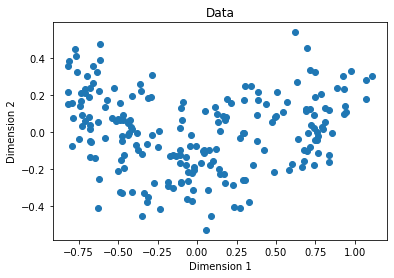

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into? [Umarız en az iki, muhtemelen üç, makul ölçüde farklı veri noktası grupları görebilirsiniz; ama burada kümelemeyle ilgili temel sorunlardan biri yatıyor - bilinen sınıf etiketleri olmadan, verilerinizi kaç kümeye ayıracağınızı nasıl bileceksiniz?]

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. [Bulmaya çalışmamızın bir yolu, artan sayıda kümeye sahip bir dizi kümeleme modeli oluşturmak için bir veri örneği kullanmak ve veri noktalarının her küme içinde ne kadar sıkı gruplandığını ölçmektir.] A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. [Bu sıkılığı ölçmek için sıklıkla kullanılan bir metrik, küme içi kareler toplamıdır (WCSS), daha düşük değerler veri noktalarının daha yakın olduğu anlamına gelir.] You can then plot the WCSS for each model. [Daha sonra her model için WCSS'yi çizebilirsiniz.]

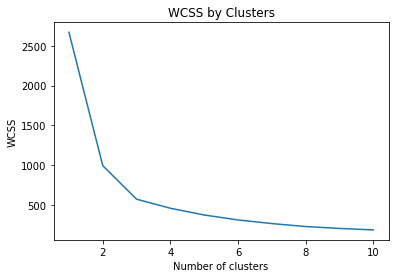

In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. [Grafik, küme sayısı bir'den ikiye yükseldikçe WCSS'de büyük bir azalma (böylece daha fazla sıkılık) ve ikiden üç kümeye daha belirgin bir azalma gösterir.] After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. [Bundan sonra, azalma daha az belirgindir, bu da grafikte yaklaşık üç kümede bir 'dirsek' oluşmasına neden olur.] This is a good indication that there are two to three reasonably well separated clusters of data points. [Bu, oldukça iyi ayrılmış iki ila üç veri noktası kümesi olduğunun iyi bir göstergesidir.]

### Summary

Here we looked at what clustering means, and how to determine whether clustering might be appropriate for your data. [Burada kümelemenin ne anlama geldiğine ve kümelemenin verileriniz için uygun olup olmadığının nasıl belirleneceğine baktık.] In the next notebook, we will look at two ways of labelling the data automatically. [Bir sonraki not defterinde, verileri otomatik olarak etiketlemenin iki yolunu inceleyeceğiz.]
